In [167]:
import pandas as pd
import numpy as np

In [168]:
# load data
df = pd.read_csv('./counts.csv')
df

,angle,singles,coincidences
0,0.000000,7204.0,2
1,9.000000,14373.0,4
2,18.000000,20570.0,17
3,27.000000,23661.0,10
4,36.000000,22397.0,15
5,45.000000,17028.0,7
6,54.000000,9819.0,3
7,63.000000,3873.0,2
8,72.000000,865.0,0
9,81.000000,2109.0,0


/tmp/ipykernel_1246210/25634795.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='angle', y='singles', data=df, palette='viridis')


<Axes: xlabel='angle', ylabel='singles'>

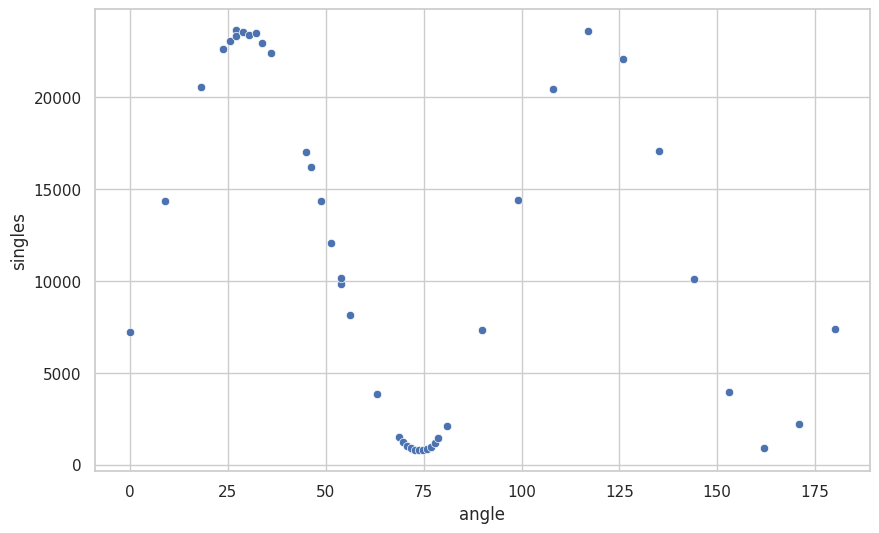

In [169]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='angle', y='singles', data=df, palette='viridis')

Fitted parameters: [-1.16736455e+04  6.97524812e-02  2.70600624e+00  1.24612504e+04]
Parameter uncertainties: [4.67418494e+01 1.05690808e-04 9.39576542e-03 3.73743464e+01]


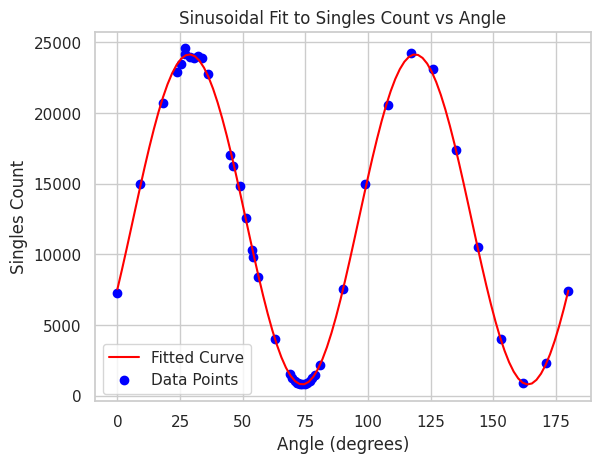

In [170]:
# Fit a sinusoidal model
from scipy.optimize import curve_fit
def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
x = df['angle'].values
y_raw = df['singles'].values

# Add multiplicative noise
noise = np.random.uniform(1, 1.05, size=y.shape)
y = y_raw * noise

params, _ = curve_fit(sinusoidal, x, y, p0=[20000, 0.10, 0, 0])

# get the uncertainty on the fit
perr = np.sqrt(np.diag(_))
print("Fitted parameters:", params)
print("Parameter uncertainties:", perr)


# Plot the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = sinusoidal(x_fit, *params)
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.scatter(x, y, color='blue', label='Data Points')
plt.title('Sinusoidal Fit to Singles Count vs Angle')
plt.xlabel('Angle (degrees)')
plt.ylabel('Singles Count')
plt.legend()
plt.show()